<a href="https://colab.research.google.com/github/Litang23/earthengine-community/blob/master/Copy_of_00_ee_auth_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.12.0
    Uninstalling xarray-2025.12.0:
      Successfully uninstalled xarray-2025.12.0


In [2]:
!pip install --upgrade xee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.6/476.6 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: earthengine-api
    Found existing installation: earthengine-api 1.5.24
    Uninstalling earthengine-api-1.5.24:
      Successfully uninstalled earthengine-api-1.5.24


In [3]:
!pip install -U geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: geemap
    Found existing installation: geemap 0.35.3
    Uninstalling geemap-0.35.3:
      Successfully uninstalled geemap-0.35.3


In [4]:
import rioxarray
import ee
import geemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import xee
import geopandas as gpd


In [5]:
ee.Authenticate()
ee.Initialize(project = "ee-grmntfrancis0",
              opt_url='https://earthengine-highvolume.googleapis.com')

In [6]:
map = geemap.Map()
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [7]:
point = map.draw_last_feature.geometry()
point

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Point",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      30.9375,
                      8.146243
                    ]
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [8]:
border = (
    ee.FeatureCollection("FAO/GAUL/2015/level0")
    .filterBounds(point)
)

In [9]:
map.addLayer(border)

In [10]:
vec = geemap.ee_to_gdf(border)
vec

,geometry,ADM0_CODE,ADM0_NAME,DISP_AREA,EXP0_YEAR,STATUS,STR0_YEAR,Shape_Area,Shape_Leng
0,GEOMETRYCOLLECTION (LINESTRING (34.00132 8.493...,74,South Sudan,NO,3000,Member State,2011,51.599166,46.905431


In [11]:
era = (
    ee.ImageCollection("ECMWF/ERA5/DAILY")
    .filterDate("2020", "2021")
    .select("mean_2m_air_temperature")
)

era

In [12]:
from jinja2.nodes import ExprStmt
ds = xr.open_dataset(
    era,
    engine = "ee",
    crs = "EPSG: 4326",
    geometry = border.geometry(),
    scale = 0.01
)

In [13]:
ds

<xarray.Dataset> Size: 789MB
Dimensions:                  (time: 191, lon: 1180, lat: 875)
Coordinates:
  * time                     (time) datetime64[ns] 2kB 2020-01-01 ... 2020-07-09
  * lon                      (lon) float64 9kB 24.16 24.17 24.18 ... 35.94 35.95
  * lat                      (lat) float64 7kB 3.492 3.502 3.512 ... 12.22 12.23
Data variables:
    mean_2m_air_temperature  (time, lon, lat) float32 789MB ...
Attributes: (12/36)
    date_range:               [284083200000, 1594252800000]
    description:              <p>ERA5 is the fifth generation ECMWF atmospher...
    keywords:                 ['climate', 'copernicus', 'dewpoint', 'ecmwf', ...
    max_mirrored_version:     1594797432309553
    period:                   1
    period_mapping:           [284083200000, 1594252800000]
    ...                       ...
    visualization_3_bands:    u_component_of_wind_10m
    visualization_3_max:      30.0
    visualization_3_min:      0.0
    visualization_3_name:     Daily mean u-component of wind at 10m
    visualization_3_palette:  #FFFFFF,#FFFF71,#DEFF00,#9EFF00,#77B038,#007E55...
    crs:                      EPSG: 4326

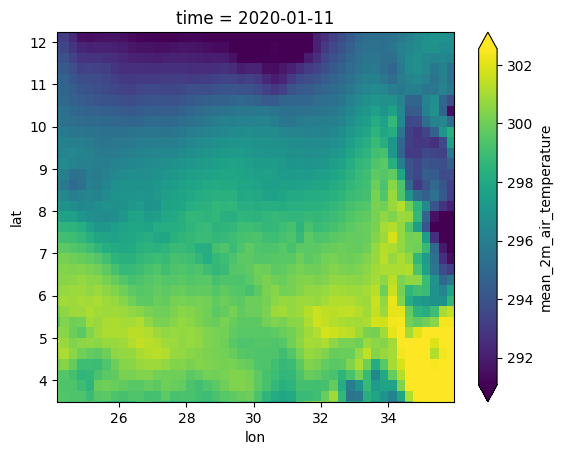

In [14]:
ds.isel(time = 10).mean_2m_air_temperature.plot(
    x = "lon",
    y = "lat",
    robust = True,
)

In [15]:
import geopandas as pgd

<Axes: >

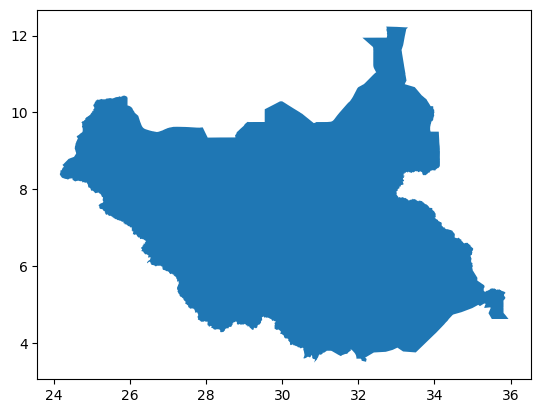

In [16]:
vec.plot()

In [17]:
vec.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
vec.geometry

,geometry
0,GEOMETRYCOLLECTION (LINESTRING (34.00132 8.493...


In [20]:
ds_rename = ds.rename({"lon": "x", "lat": "y"})


In [21]:
ds_clip = ds_rename.rio.clip(vec.geometry, vec.crs)

In [22]:
import pandas as pd


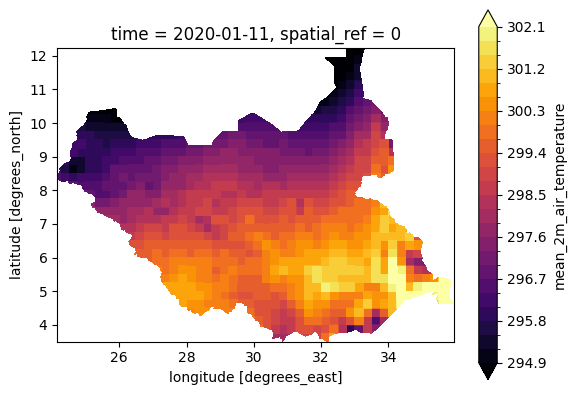

In [34]:
ds_clip.isel(time = 10).mean_2m_air_temperature.plot.contourf(
    x = "x",
    y = "y",
    robust = True,
    levels = 25,
    cmap = "inferno"
)
plt.tight_layout(rect=[0.02, 0.05, 0.098, 0.95])
plt.gca().set_aspect("equal")
plt.show()

In [35]:
ds_clip["mean_2m_air_temperature_celsius"] = ds_clip["mean_2m_air_temperature"] - 273.15

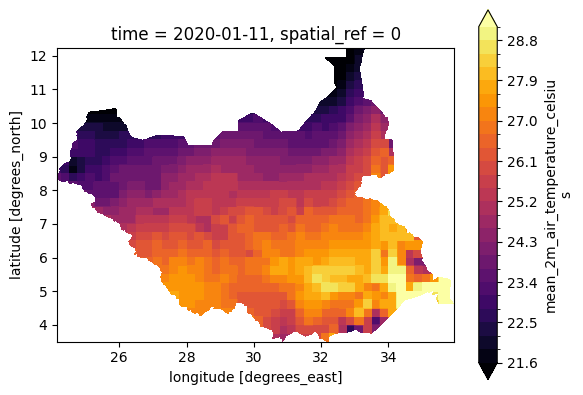

In [38]:
ds_clip.isel(time = 10).mean_2m_air_temperature_celsius.plot.contourf(
    x = "x",
    y = "y",
    robust = True,
    levels = 25,
    cmap = "inferno"
)
plt.tight_layout(rect=[0.02, 0.05, 0.098, 0.95])
plt.gca().set_aspect("equal")
plt.show()